# svm on Churn dataset

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [147]:
df = pd.read_csv("ChurnData.csv")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11,33,7,136,5,5,0,1,1,4.40,...,1,0,1,1,0,1.482,3.033,4.913,4,1
1,33,33,12,33,2,0,0,0,0,9.45,...,0,0,0,0,0,2.246,3.240,3.497,1,1
2,23,30,9,30,1,2,0,0,0,6.30,...,0,0,0,1,0,1.841,3.240,3.401,3,0
3,38,35,5,76,2,10,1,1,1,6.05,...,1,1,1,1,1,1.800,3.807,4.331,4,0
4,7,35,14,80,2,15,0,1,0,7.10,...,0,0,1,1,0,1.960,3.091,4.382,3,0


In [148]:
K = df["churn"].value_counts()


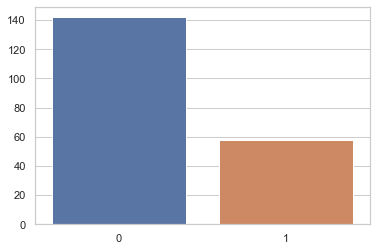

In [149]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=K.index, y=K.values, data=df)

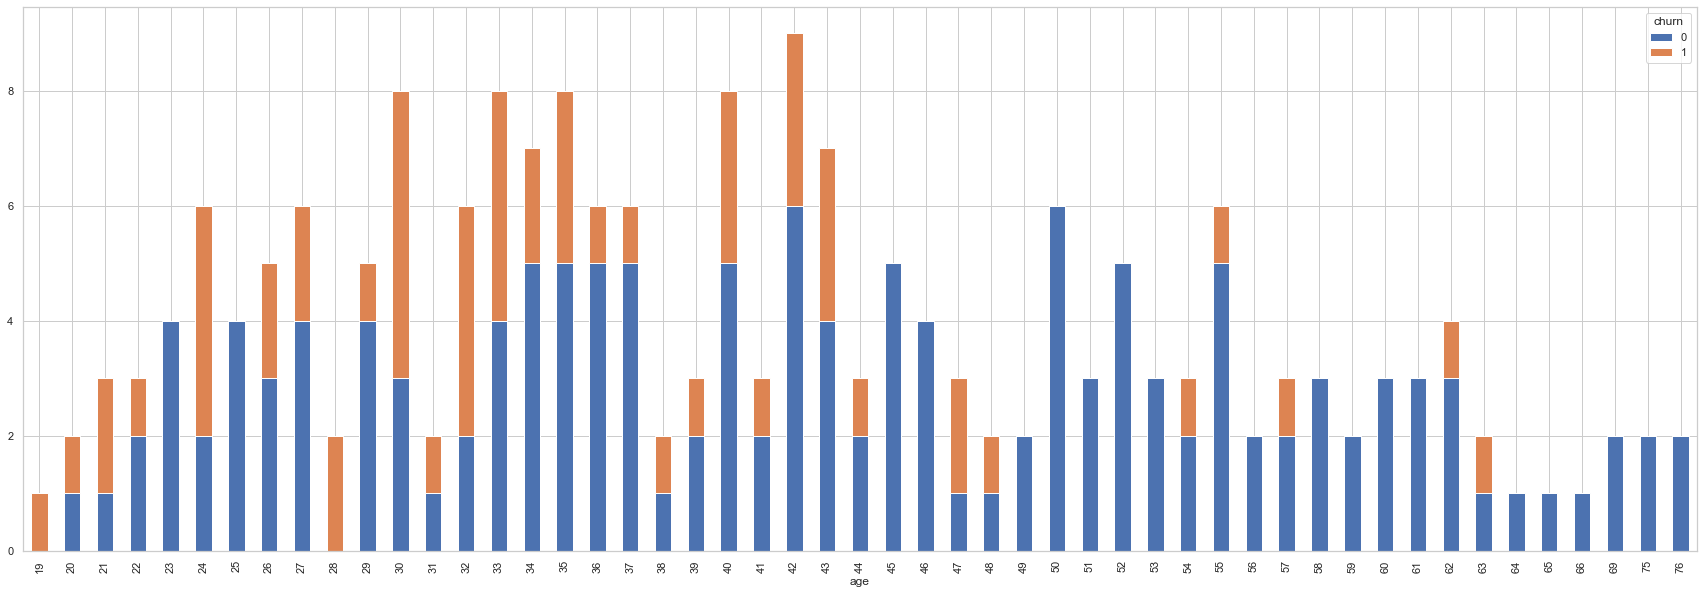

In [150]:
df.groupby(["age", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

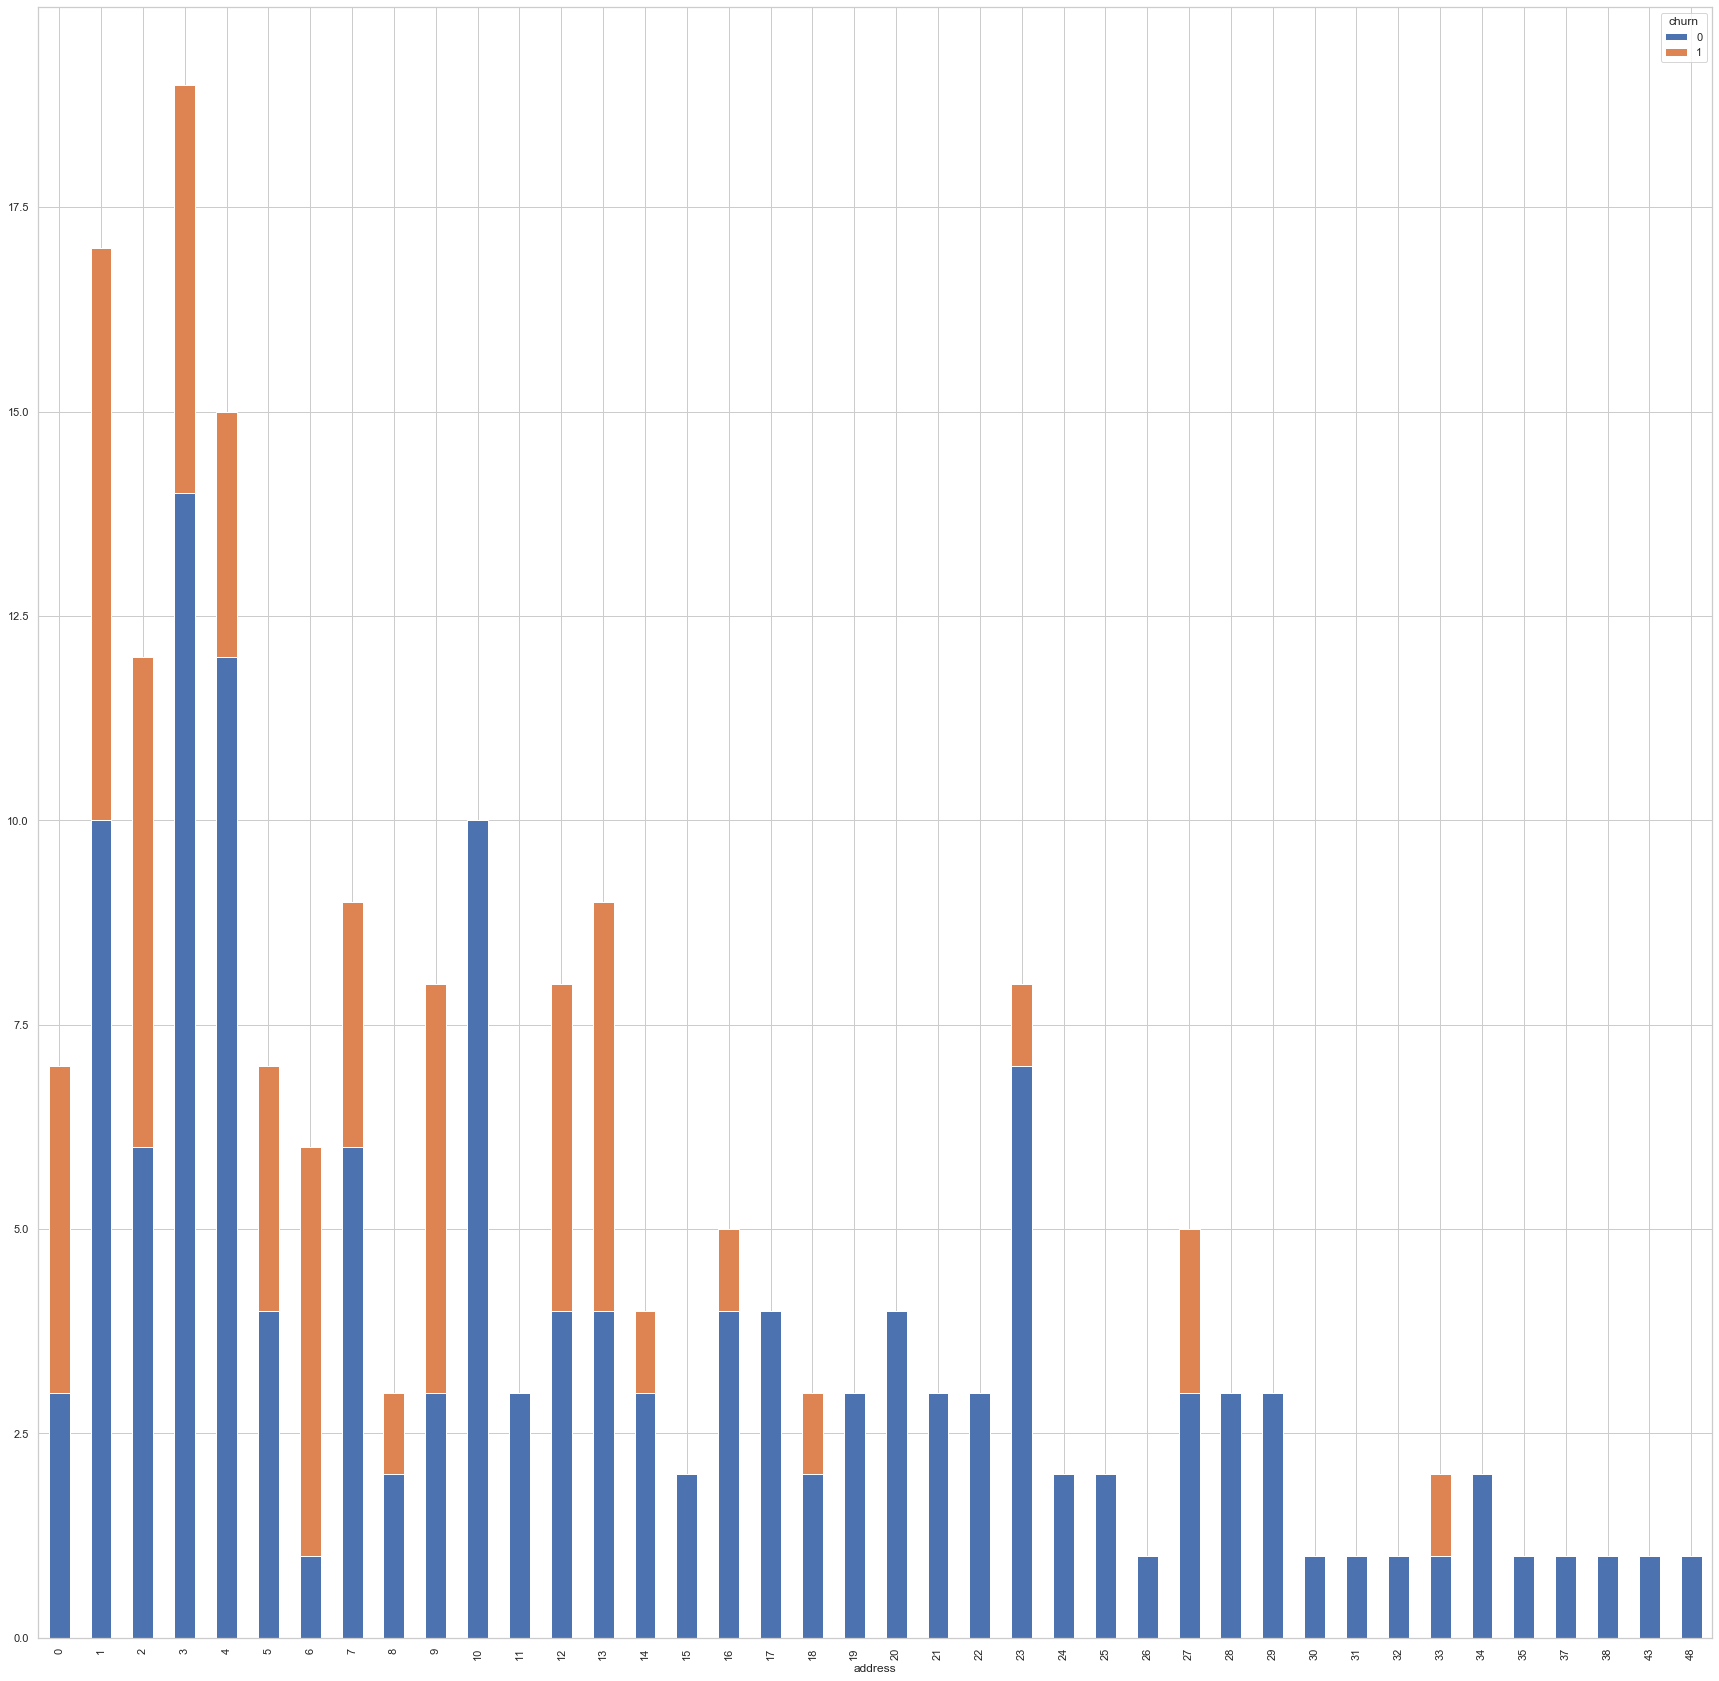

In [151]:
df.groupby(["address", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,30)) 


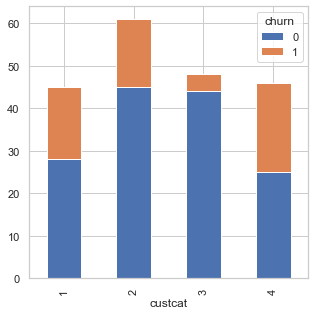

In [152]:
df.groupby(["custcat", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 


In [153]:
print(df.columns.tolist())

['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager', 'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll', 'lninc', 'custcat', 'churn']


In [154]:
X = df[['tenure', 'longmon', 'tollmon','age','loglong', 'logtoll', 'lninc' , 'income', 'ed', 'employ']]
X[0:5]

,tenure,longmon,tollmon,age,loglong,logtoll,lninc,income,ed,employ
0,11,4.40,20.75,33,1.482,3.033,4.913,136,5,5
1,33,9.45,0.00,33,2.246,3.240,3.497,33,2,0
2,23,6.30,0.00,30,1.841,3.240,3.401,30,1,2
3,38,6.05,45.00,35,1.800,3.807,4.331,76,2,10
4,7,7.10,22.00,35,1.960,3.091,4.382,80,2,15


In [155]:
y = df['churn'].astype('int')
y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int32

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, test_size = 0.4, random_state = 100)

In [157]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (120, 10) (120,)
Test set: (80, 10) (80,)


In [158]:
from sklearn import svm


In [159]:
clf=svm.SVC(kernel='rbf').fit(X_train,y_train)


In [160]:
yhat=clf.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [161]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,yhat)
score

0.6625

In [162]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,yhat)
cnf_matrix

array([[53,  0],
       [27,  0]], dtype=int64)

In [163]:
clf=svm.SVC(kernel='linear').fit(X_train,y_train)

In [164]:
yhat1=clf.predict(X_test)
yhat1

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [165]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,yhat1)
score

0.7

In [166]:
clf=svm.SVC(kernel='sigmoid').fit(X_train,y_train)

In [167]:
yhat2=clf.predict(X_test)
yhat2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [168]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,yhat2)
score

0.6625

# Svm using another dataframe in churn dataset

In [169]:
X = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip','custcat']]

In [170]:
y = df['churn']

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=4)

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(max_iter = 500).fit(X_train,y_train)
LR

LogisticRegression(max_iter=500)

In [173]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [174]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,yhat)
print(cnf_matrix)


[[48  7]
 [18  7]]


In [175]:
(48+7)/(48+7+18+7)

0.6875

In [176]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 

SVC(kernel='linear')

In [177]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [178]:
cnf_matrix = confusion_matrix(y_test,yhat)

print(cnf_matrix)

[[50  5]
 [16  9]]


In [179]:
(50+9)/(5+16+50+9)

0.7375

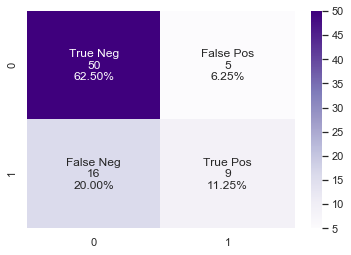

In [181]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cnf_matrix,fmt='', annot=labels,cmap='Purples')

# SVM on Castcat dataset

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('teleCust1000t.csv')
print(df)

     region  tenure  age  marital  address  income  ed  employ  retire  \
0         2      13   44        1        9      64   4       5       0   
1         3      11   33        1        7     136   5       5       0   
2         3      68   52        1       24     116   1      29       0   
3         2      33   33        0       12      33   2       0       0   
4         2      23   30        1        9      30   1       2       0   
..      ...     ...  ...      ...      ...     ...  ..     ...     ...   
995       3      10   39        0        0      27   3       0       0   
996       1       7   34        0        2      22   5       5       0   
997       3      67   59        0       40     944   5      33       0   
998       3      70   49        0       18      87   2      22       0   
999       3      50   36        1        7      39   3       3       0   

     gender  reside  custcat  
0         0       2        1  
1         0       6        4  
2         1       

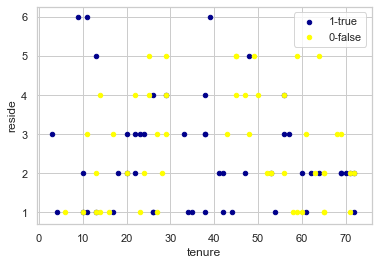

In [205]:
ax = df[df['custcat'] == 4][0:50].plot(kind='scatter', x='tenure', y='reside', color='DarkBlue', label='1-true');
df[df['custcat'] == 2][0:50].plot(kind='scatter', x='tenure', y='reside', color='Yellow', label='0-false', ax=ax);
plt.show()

In [206]:
X = np.asarray(df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'gender', 'reside']])
X[0:5]

array([[  2,  13,  44,   1,   9,  64,   0,   2],
       [  3,  11,  33,   1,   7, 136,   0,   6],
       [  3,  68,  52,   1,  24, 116,   1,   2],
       [  2,  33,  33,   0,  12,  33,   1,   1],
       [  2,  23,  30,   1,   9,  30,   0,   4]], dtype=int64)

In [207]:
df['cust'] = (df['custcat']>1) * 1
y = df['cust'].copy()
y.head()

0    0
1    1
2    1
3    0
4    1
Name: cust, dtype: int32

In [208]:
y = np.asarray(df['cust'].astype('int'))
y[0:5]

array([0, 1, 1, 0, 1])

In [209]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, test_size = 0.4, random_state = 100)

In [210]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (600, 8) (600,)
Test set: (400, 8) (400,)


In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(max_iter = 500).fit(X_train,y_train)
LR

LogisticRegression(max_iter=500)

In [212]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [213]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,yhat)
print(cnf_matrix)


[[ 10 103]
 [ 14 273]]


In [214]:
283/(10+103+14+273)

0.7075

In [215]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 

SVC(kernel='linear')

In [216]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 1])

In [217]:
cnf_matrix = confusion_matrix(y_test,yhat)

print(cnf_matrix)

[[  0 113]
 [  0 287]]


In [218]:
(287)/(113+287)

0.7175

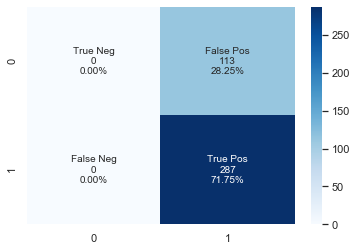

In [219]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cnf_matrix,fmt='', annot=labels,cmap='Blues')